In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import backend as K
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/UNVR.JK.csv')

In [ ]:
dataset_train = df[0:int(len(df)*0.8)]

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-09-03,615.0,675.0,605.0,675.0,395.962769,43162500
1,2003-09-04,690.0,750.0,675.0,685.0,401.828796,82850000
2,2003-09-05,685.0,700.0,680.0,690.0,404.761993,24055000
3,2003-09-08,690.0,690.0,665.0,680.0,398.895813,18007500
4,2003-09-09,680.0,680.0,660.0,665.0,390.096558,14075000


In [ ]:
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.        ],
       [0.00775595],
       [0.00723888],
       ...,
       [1.        ],
       [0.99120993],
       [0.99120993]])

In [ ]:
X_train = []
y_train = []
for i in range(60, 3484):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train

array([[[0.        ],
        [0.00775595],
        [0.00723888],
        ...,
        [0.00206825],
        [0.00206825],
        [0.00206825]],

       [[0.00775595],
        [0.00723888],
        [0.00775595],
        ...,
        [0.00206825],
        [0.00206825],
        [0.00206825]],

       [[0.00723888],
        [0.00775595],
        [0.00672182],
        ...,
        [0.00206825],
        [0.00206825],
        [0.00206825]],

       ...,

       [[0.94570838],
        [0.94570838],
        [0.94570838],
        ...,
        [0.99120993],
        [0.99844881],
        [0.98965874]],

       [[0.94570838],
        [0.94570838],
        [0.94570838],
        ...,
        [0.99844881],
        [0.98965874],
        [1.        ]],

       [[0.94570838],
        [0.94570838],
        [0.96018614],
        ...,
        [0.98965874],
        [1.        ],
        [0.99120993]]])

In [ ]:
def r2_keras(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [ ]:
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, 
                   input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[r2_keras])

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
27/27 [==============================] - 27s 196ms/step - loss: 0.0890 - r2_keras: 0.0459
Epoch 2/100
27/27 [==============================] - 5s 195ms/step - loss: 0.0039 - r2_keras: 0.9562
Epoch 3/100
27/27 [==============================] - 5s 196ms/step - loss: 0.0028 - r2_keras: 0.9690
Epoch 4/100
27/27 [==============================] - 5s 197ms/step - loss: 0.0025 - r2_keras: 0.9722
Epoch 5/100
27/27 [==============================] - 5s 195ms/step - loss: 0.0023 - r2_keras: 0.9734
Epoch 6/100
27/27 [==============================] - 5s 196ms/step - loss: 0.0022 - r2_keras: 0.9749
Epoch 7/100
27/27 [==============================] - 5s 193ms/step - loss: 0.0022 - r2_keras: 0.9755
Epoch 8/100
27/27 [==============================] - 5s 196ms/step - loss: 0.0018 - r2_keras: 0.9789
Epoch 9/100
27/27 [==============================] - 5s 193ms/step - loss: 0.0021 - r2_keras: 0.9761
Epoch 10/100
27/27 [==============================] - 5s 194ms/step - loss: 0.0022 - r2_ke

In [ ]:
dataset_test = df[int(len(df)*0.8):]

In [ ]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3484,2017-09-22,10200.0,10205.0,9975.0,10000.0,9214.177734,13066500
3485,2017-09-25,10000.0,10005.0,9795.0,9940.0,9158.892578,9983000
3486,2017-09-26,9940.0,9955.0,9830.0,9870.0,9094.393555,8519000
3487,2017-09-27,9965.0,10030.0,9910.0,10000.0,9214.177734,10578500
3488,2017-09-28,10025.0,10090.0,9815.0,9840.0,9066.750977,12687500


In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 931):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predict = np.array(predicted_stock_price)

df_results = pd.DataFrame()
df_results['Real'] = dataset_test['Open'].reset_index(drop = True)
df_results['Predict'] = predict
df_results.tail()

,Real,Predict
866,6975.0,7212.505859
867,6900.0,7190.131348
868,6850.0,7160.656250
869,6850.0,7125.056641
870,6750.0,7085.582520


In [ ]:
df_results.to_excel("testing_rnn.xlsx")

In [ ]:
r2 = r2_score(df_results['Real'], df_results['Predict'])
r2 = r2 * 100
print ('Koefisien Determinasi : ' "{:.2f}".format(r2)+' %')

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape1 = mape(df_results['Real'], df_results['Predict'])
print ('Mean Absolute Persentage Error : ' "{:.2f}".format(mape1)+' %')

Koefisien Determinasi : 92.74 %
Mean Absolute Persentage Error : 2.38 %


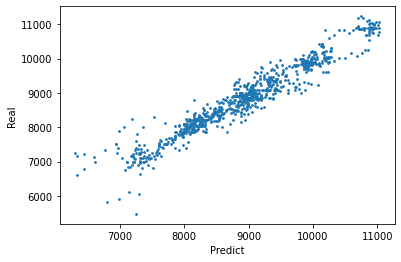

In [ ]:
plt.scatter(x = df_results['Predict'], y = df_results['Real'], s = 3)
plt.xlabel('Predict', fontsize = 10)
plt.ylabel('Real', fontsize = 10)
plt.show()

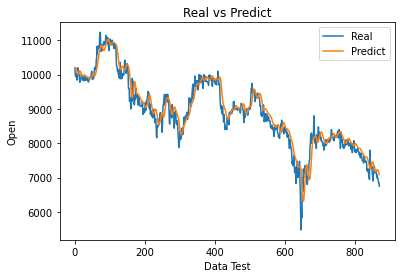

In [ ]:
plt.plot(df_results['Real'])
plt.plot(df_results['Predict'])
plt.xlabel('Data Test', fontsize = 10)
plt.ylabel('Open', fontsize = 10)
plt.legend(['Real', 'Predict'])
plt.title('Real vs Predict')
plt.show()